# Load previously cleaned and merged properties (comps)

The file being imported below was constructed in the last seven exploratory notebooks (1.0 to 1.6). These data have been cleaned and merged so we can start the exploratory data analysis.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import pickle

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from src.definitions import ROOT_DIR
from src.data.utils import Table, save_pickle

In [3]:
comps_fn = ROOT_DIR / 'data/interim/2016/comps.pickle'
assert comps_fn.exists()

with open(comps_fn, 'rb') as f:
    comps = pickle.load(f)

In [4]:
comps.shape

(957686, 81)

In [5]:
comps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957686 entries, 0 to 957685
Data columns (total 81 columns):
 #   Column                                          Non-Null Count   Dtype         
---  ------                                          --------------   -----         
 0   acct                                            957686 non-null  uint64        
 1   dscr                                            957686 non-null  category      
 2   date_erected                                    957686 non-null  uint16        
 3   yr_remodel                                      86406 non-null   float64       
 4   im_sq_ft                                        957683 non-null  float64       
 5   act_ar                                          957686 non-null  uint16        
 6   heat_ar                                         957682 non-null  float64       
 7   gross_ar                                        957686 non-null  uint16        
 8   eff_ar                            

In [6]:
comps.sample(10)

,acct,dscr,date_erected,yr_remodel,im_sq_ft,act_ar,heat_ar,gross_ar,eff_ar,perimeter,...,one_story_mas_pri,open_frame_porch_pri,open_mas_porch_pri,cond_desir_util,cost_and_design,exterior_wall,foundation_type,grade_adjustment,heating_ac,physical_condition
309237,962450000006,Average,1977,NaN,1592.0,2133,1592.0,2133,1798.0,268.0,...,0.0,0.0,0.0,Average,NaN,Frame / Concrete Blk,Slab,C,Central Heat/AC,Average
240890,844180000005,Average,1958,NaN,1770.0,2514,1770.0,2514,2070.0,240.0,...,0.0,100.0,0.0,Average,NaN,Frame / Concrete Blk,Slab,C+,Central Heat/AC,Average
625290,1159870470027,Average,1987,NaN,3628.0,4153,3628.0,4153,3670.0,520.0,...,0.0,0.0,25.0,Good,NaN,Frame / Concrete Blk,Slab,C+,Central Heat/AC,Average
844069,1262800020031,Good,2005,NaN,3296.0,4386,3296.0,4386,3639.0,360.0,...,0.0,298.0,134.0,Average,NaN,Brick / Veneer,Slab,B+,Central Heat/AC,Average
476424,1111580000008,Good,1980,NaN,2671.0,3278,2671.0,3278,2768.0,324.0,...,416.0,259.0,220.0,Average,NaN,Brick / Masonry,Slab,B-,Central Heat/AC,Average
543025,1143950060004,Average,1983,NaN,1210.0,1745,1210.0,1745,1410.0,198.0,...,0.0,55.0,0.0,Average,NaN,Frame / Concrete Blk,Slab,C,Central Heat/AC,Average
291900,934130000003,Average,1971,NaN,1908.0,2174,1908.0,2174,2043.0,186.0,...,0.0,16.0,0.0,Average,NaN,Brick / Veneer,Slab,C+,Central Heat/AC,Average
783106,1237680020002,Average,2005,NaN,1094.0,1600,1094.0,1600,1281.0,170.0,...,0.0,0.0,106.0,Average,NaN,Frame / Concrete Blk,Slab,C+,Central Heat/AC,Average
903906,1297160010006,Excellent,2010,NaN,4310.0,4869,4310.0,4869,4274.0,482.0,...,0.0,0.0,196.0,Average,NaN,Brick / Masonry,Slab,A,Central Heat/AC,Average
595438,1153270170024,Average,1983,NaN,1359.0,1875,1359.0,1875,1549.0,198.0,...,0.0,116.0,0.0,Good,Partial,Frame / Concrete Blk,Slab,C,Central Heat/AC,Good


## Drop account numbers
The account numbers are kept as a reference to the raw data, but should not be used in the EDA.

In [7]:
comps = comps.loc[:, 'dscr':]

In [8]:
comps.sample(10)

,dscr,date_erected,yr_remodel,im_sq_ft,act_ar,heat_ar,gross_ar,eff_ar,perimeter,fireplace_masonry_firebrick,...,one_story_mas_pri,open_frame_porch_pri,open_mas_porch_pri,cond_desir_util,cost_and_design,exterior_wall,foundation_type,grade_adjustment,heating_ac,physical_condition
75427,Average,2011,NaN,1268.0,1380,1268.0,1380,1305.0,152.0,0.0,...,0.0,112.0,0.0,Average,New / Rebuilt,Frame / Concrete Blk,Slab,C,Central Heat/AC,Average
935561,Average,2013,NaN,2349.0,3040,2349.0,3040,2515.0,362.0,0.0,...,0.0,190.0,84.0,Average,NaN,Frame / Concrete Blk,Slab,C+,Central Heat/AC,Average
98356,Average,1945,NaN,1391.0,1817,1391.0,1817,1478.0,168.0,0.0,...,0.0,144.0,0.0,Average,NaN,Aluminum / Vinyl,Crawl Space,D,Central Heat/AC,Average
480087,Average,1980,NaN,1524.0,2034,1524.0,2034,1716.0,204.0,0.0,...,0.0,0.0,48.0,Average,NaN,Brick / Veneer,Slab,C,Central Heat/AC,Average
905276,Good,2014,NaN,1791.0,2236,1791.0,2236,1844.0,284.0,0.0,...,0.0,0.0,65.0,Average,NaN,Brick / Veneer,Slab,B-,Central Heat/AC,Average
577999,Average,1982,NaN,1868.0,2600,1868.0,2600,2133.0,226.0,0.0,...,0.0,272.0,0.0,Average,NaN,Frame / Concrete Blk,Slab,C,Central Heat/AC,Average
9652,Average,1920,2014.0,1931.0,2504,1931.0,2504,2132.0,218.0,0.0,...,0.0,285.0,0.0,Average,Extensive,Asbestos,Crawl Space,C-,Central Heat/AC,Very Good
360416,Good,1977,NaN,3334.0,3634,3334.0,3634,3335.0,376.0,1.0,...,1350.0,0.0,124.0,Very Good,NaN,Brick / Masonry,Slab,B+,Central Heat/AC,Average
581466,Average,1982,NaN,1622.0,1742,1622.0,1742,1634.0,248.0,0.0,...,196.0,60.0,0.0,Average,NaN,Frame / Concrete Blk,Slab,C,Central Heat/AC,Average
604814,Good,2005,NaN,1914.0,2455,1914.0,2455,2115.0,220.0,0.0,...,0.0,0.0,72.0,Average,NaN,Brick / Veneer,Slab,B-,Central Heat/AC,Average


# Preliminary report

Since there are 80 features in this dataset, it is best to explore them using an automated tool like [Sweetviz](https://github.com/fbdesignpro/sweetviz). This will take care of building the histograms and summary statistics for each feature, and also will provide an association plot between all the variables. I will select the variables from this plot to further investigate interesting associations.

## Reset dtypes to work with Sweetviz
Running `sweetviz` with the `comps` data "as is" was throwing a `TypeError` associated with the categorical columns, so here I change their type to `object`.

In [9]:
for col in comps.columns:
    if str(comps[col].dtype) == 'category':
        comps[col] = comps[col].astype('object')

In [10]:
comps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957686 entries, 0 to 957685
Data columns (total 80 columns):
 #   Column                                          Non-Null Count   Dtype         
---  ------                                          --------------   -----         
 0   dscr                                            957686 non-null  object        
 1   date_erected                                    957686 non-null  uint16        
 2   yr_remodel                                      86406 non-null   float64       
 3   im_sq_ft                                        957683 non-null  float64       
 4   act_ar                                          957686 non-null  uint16        
 5   heat_ar                                         957682 non-null  float64       
 6   gross_ar                                        957686 non-null  uint16        
 7   eff_ar                                          957685 non-null  float64       
 8   perimeter                         

## Run Sweetviz

In [11]:
import sweetviz as sv

In [12]:
# This takes a long time to run (37 min), change flag to True if need to re-run
if False:
    my_report = sv.analyze(comps, target_feat='tot_appr_val')
    my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

The cell above creates a file (notebooks/01_Exploratory/SWEETVIZ_REPORT.html) with the resulting plots.

# Features exploration
Let's start by review the association plot in the sweetviz report.

![Sweetviz all variables association](figures/sv_all_variables_association.png)

Impressive!

There is a strong association in most variables in the top left quadrant. I'm particularly interested in exploring the associations with the total appraise value (`tot_appr_val`) so let's look at its individual association table.

![total apprasied value association tables](figures/tot_appr_val_associations_tables.png)

Now let's select the numerical and categorical features with strong association (> 0.59) to our target variable and examine these in detail.

In [13]:
num_features = [
    'tot_appr_val',
    'prior_tot_appr_val',
    'prior_land_val',
    'land_val',
    'eff_ar',
    'bld_ar',
    'heat_ar',
    'im_sq_ft',
    'gross_ar',
    'act_ar',
    'fixtures_total',
    'perimeter',
    'room_full_bath',
]

cat_features = [
    'grade_adjustment',
    'market_area_1_dscr',
    'market_area_2_dscr',
    'dscr',
]

# Selected features analysis

## Total appraised value: tot_appr_val
Let's begin with a description of our target variable: total appraised value.

In [14]:
from src.visualization.visualize import plot_ecdf, plot_counts, plot_hist

plt.style.use('ggplot')

Check for null values

In [15]:
comps['tot_appr_val'][comps['tot_appr_val'].isna()]

93526    NaN
930731   NaN
953538   NaN
954835   NaN
Name: tot_appr_val, dtype: float64

let's remove these from the comps dataframe

In [16]:
comps.dropna(axis=0, how='any', subset=['tot_appr_val'], inplace=True)

Now let's build the plots

In [17]:
col ='tot_appr_val'
series = comps[col]

In [18]:
series.describe()

count    9.576820e+05
mean     2.192134e+05
std      2.799956e+05
min      1.000000e+02
25%      1.000000e+05
50%      1.502620e+05
75%      2.344580e+05
max      1.726682e+07
Name: tot_appr_val, dtype: float64

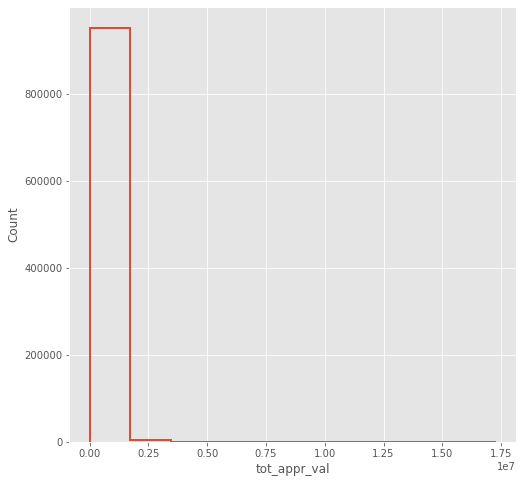

In [19]:
plot_hist(series, col)

The high valued properties are masking the distribution of the lower valued properties in this histogram. Let's remake this figure with only properties valued less than $500k

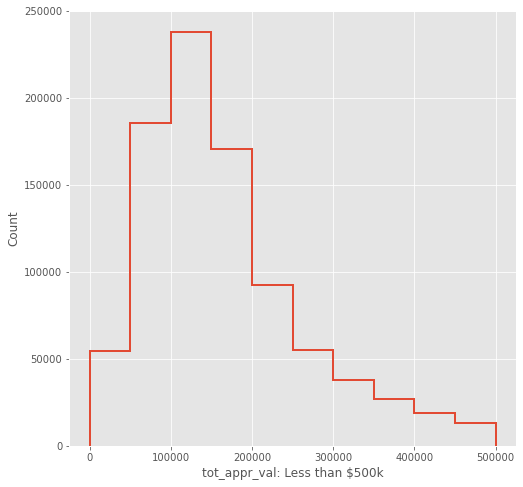

In [20]:
plot_hist(series[series < 500000], col + ': Less than $500k')

So the most common value is around $150k with a right-skewed distribution.

Quantile 10%: 64137.10
Quantile 25%: 100000.00
Quantile 50%: 150262.00
Quantile 75%: 234458.00
Quantile 90%: 401087.70


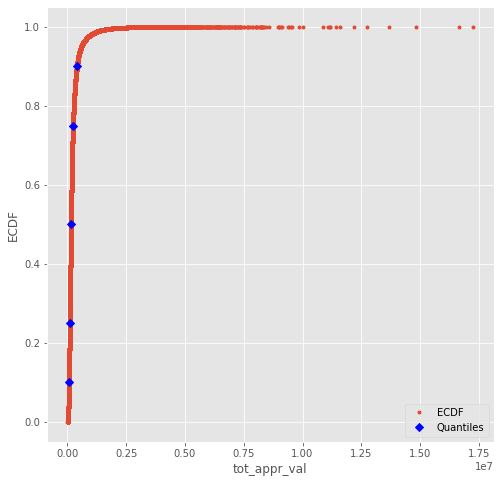

In [21]:
plot_ecdf(series, col)

More than 90% of the properties are valued less than ~$400K

## Check for features interdependence
I'd like to drop highly interdependent features. Since there are so many to check, I'll group, compare, and select them first by major categories (value, area, fixtures), and then repeat the process for the final feature selection. 

### Value metrics

In [22]:
values = [
    'tot_appr_val',
    'prior_tot_appr_val',
    'prior_land_val',
    'land_val',
]

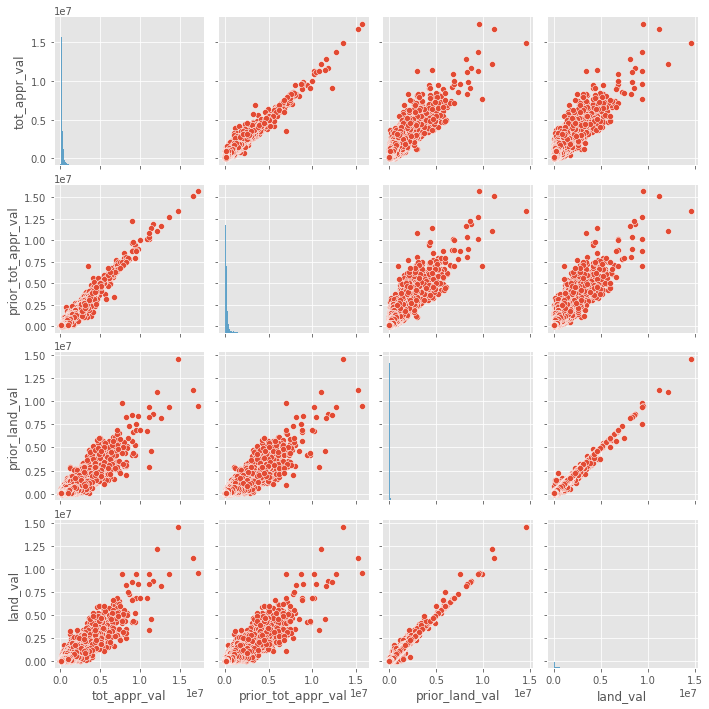

In [23]:
_ = sns.pairplot(comps.loc[:, values])

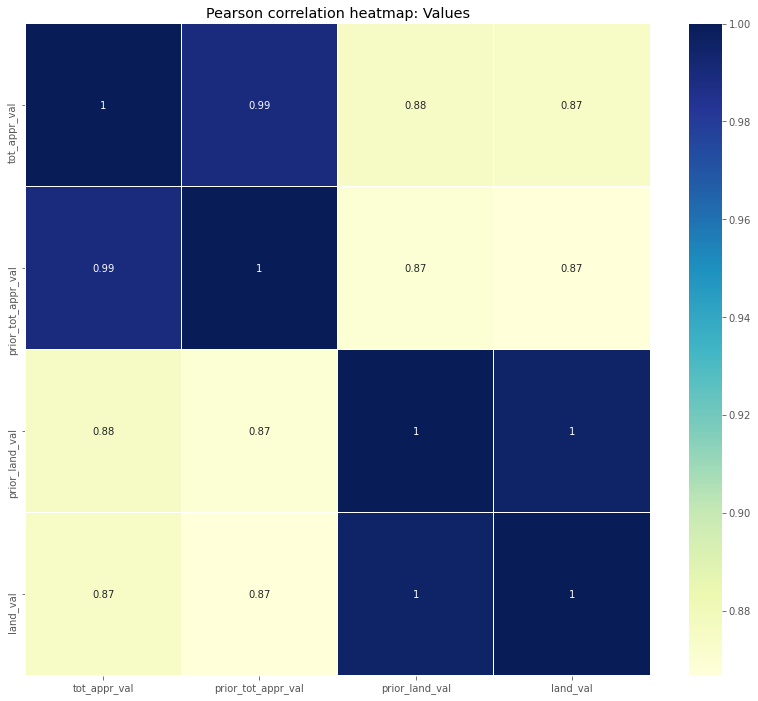

In [24]:
plt.figure(figsize=(14,12))
_ = sns.heatmap(comps.loc[:, values].corr(), linewidths=0.1, cmap='YlGnBu', annot=True)
_ = plt.title('Pearson correlation heatmap: Values')

The total appraised value (`tot_appr_val`) is highly correlated to the prior year value (`prior_tot_appr_val`). It is reasonable to assume that both of these should include the land value (total_value = land_value + building_value), and since the current land value (`land_val`) and prior land value (`prior_land_val`) are so highly correlated we can do with just one of these. I'll select the prior land value as it should be available for all properties.

## Area metric

These features were encountered first on the notebook: [notebooks/01_Exploratory/1.0-rp-hcad-data-view-building-res](1.0-rp-hcad-data-view-building-res.ipynb).

Here is a brief description:

1. im_sq_ft: Improvement area.
2. act_ar: Actual area. For residential properties this is the base area of the house.
3. heat_ar: Living Area or Building sqft of a residential building. 
4. gross_ar: Usually equal to Actual area, except in 1+1/2 story houses. Commercial properties do not use Gross Area.
5. eff_ar: Effective area. This is used in determining the market value of the improvements, but there is no clear definition in the HCAD website.

In [25]:
areas = [
    'tot_appr_val',
    'eff_ar',
    'bld_ar',
    'heat_ar',
    'im_sq_ft',
    'gross_ar',
    'act_ar',
    'perimeter'
]

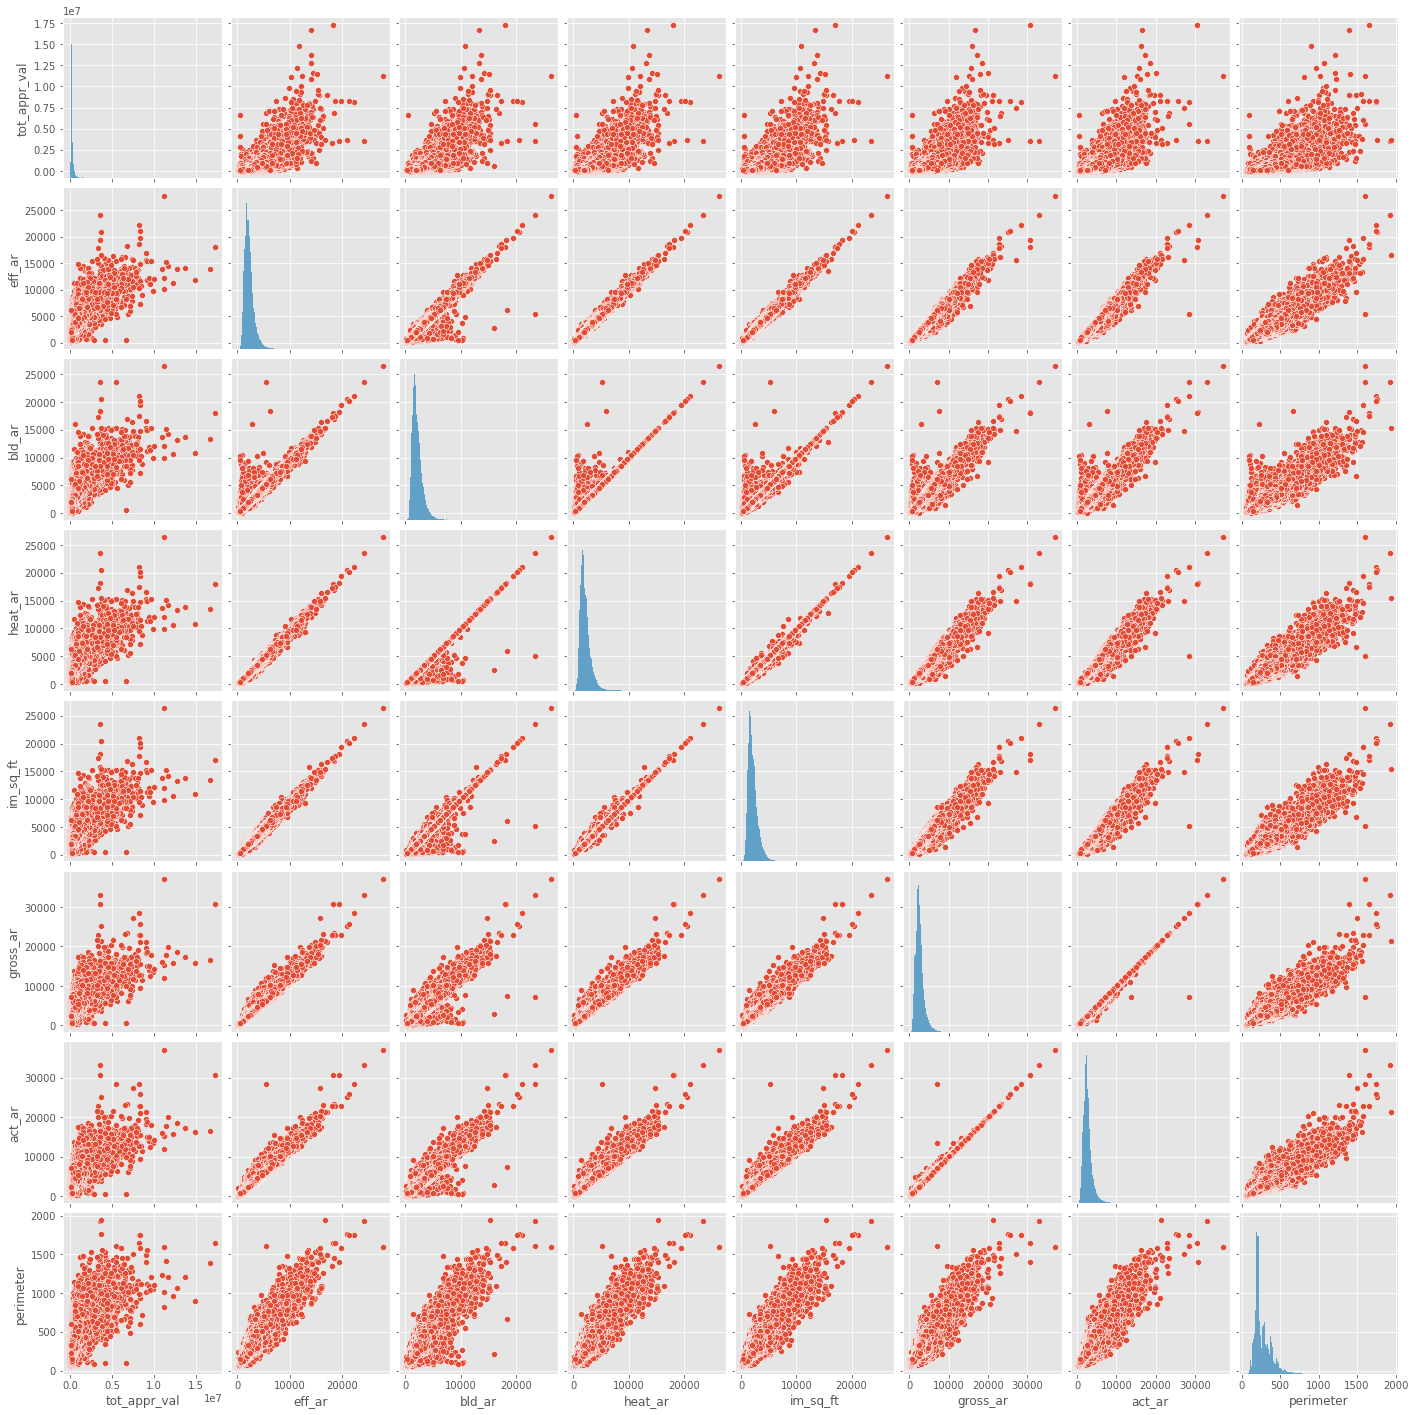

In [26]:
_ = sns.pairplot(comps.loc[:, areas])

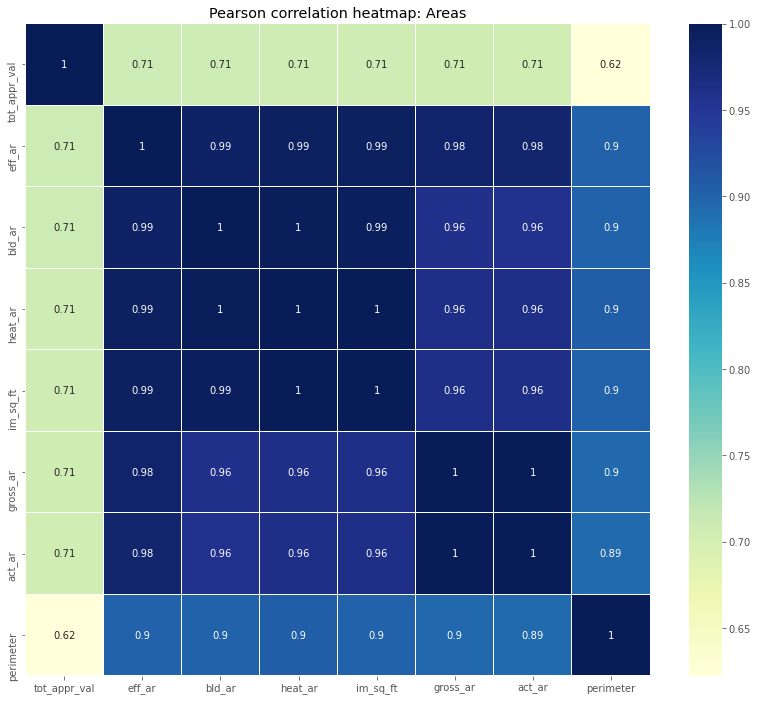

In [27]:
plt.figure(figsize=(14,12))
_ = sns.heatmap(comps.loc[:, areas].corr(), linewidths=0.1, cmap='YlGnBu', annot=True)
_ = plt.title(f'Pearson correlation heatmap: Areas')

Since all the areas and perimeter are highly correlated between them, we can select one to continue our analysis. I think the most accessible area is the improvement area (`im_sq_ft`) since it represents the sum of all the areas of the buildings in the property. This value should be relatively easy to obtain for a homeowner. 

## Fixtures

In [28]:
fixtures = [
    'tot_appr_val',
    'fixtures_total',
    'room_full_bath',
]

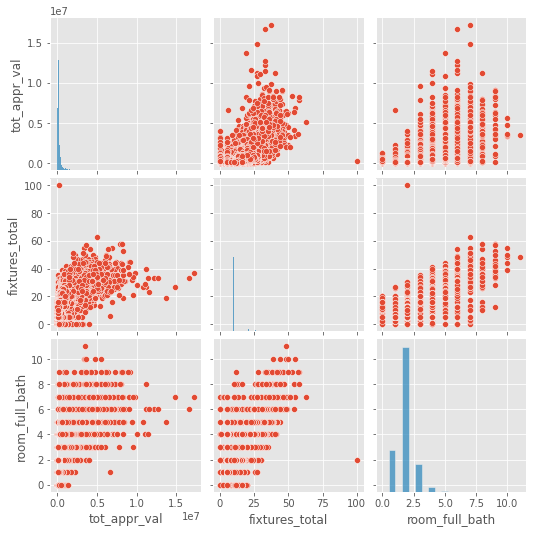

In [29]:
_ = sns.pairplot(comps.loc[:, fixtures])

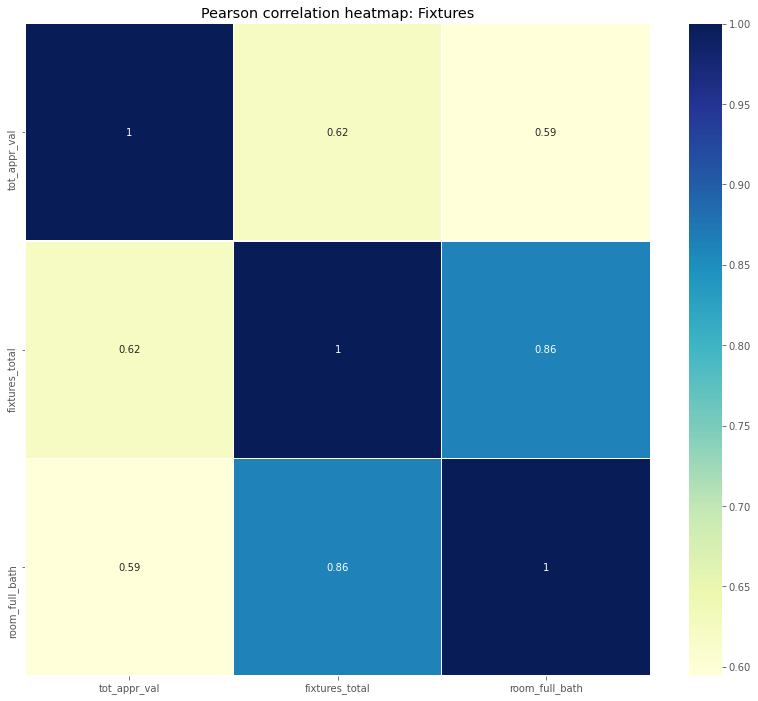

In [30]:
plt.figure(figsize=(14,12))
_ = sns.heatmap(comps.loc[:, fixtures].corr(), linewidths=0.1, cmap='YlGnBu', annot=True)
_ = plt.title(f'Pearson correlation heatmap: Fixtures')

It looks like we can treat the total number of bathrooms as a categorical variable. Let's look at appraised value boxplots split by `room_full_bath`.

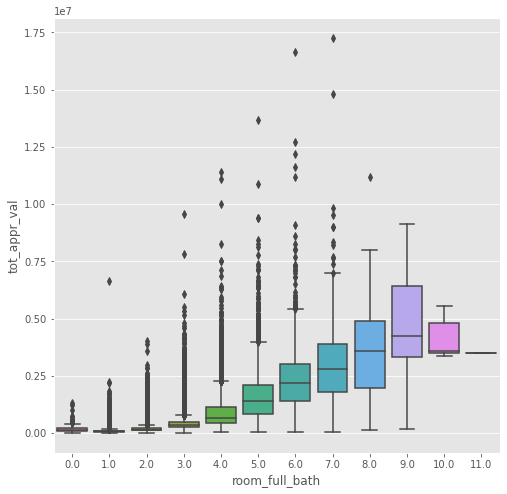

In [31]:
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.boxplot(x='room_full_bath', y='tot_appr_val', data=comps)

In [32]:
comps['room_full_bath'].value_counts()

2.0     627043
1.0     181519
3.0     122080
4.0      20616
5.0       4665
6.0       1193
7.0        325
0.0        141
8.0         69
9.0         25
10.0         5
11.0         1
Name: room_full_bath, dtype: int64

Not counting properties with 10 and 11 full bathrooms (low sample size), we can see that having more full baths start to positively associate to appraised value past the 4th bathroom. It is possible that there are lurking factor here, e.g. bigger houses are in more expensive neighborhoods and have more full bathrooms, so we should check for this below.

Also, the sum of all fixtures (`fixtures_total`) should contain the `room_full_bath`, as the latter are fixtures. Let's keep this in mind while further refining our feature selection.

## Categorical features
Let's explore the relationship of each one of the categorical features with the total appraised value. As a reminder here are the definitions of the categories we are about to expore:

1) **Grade adjustment**: The grade is a factor that is intended to reflect an overall judgment of the quality of workmanship and materials evident in a dwelling ([HCAD](https://hcad.org/hcad-resources/hcad-appraisal-codes/hcad-building-grade-adjustment/)). The scale of factors runs from E- (lowest), E, E+, D-, D, D+, C-, C, C+, B-, B, B+, A-, A, A+, X-, X, X+ (highest).

2) **Market area 1 dscr**: Market areas are defined by the physical, economic, governmental and social forces that influence property values. The effects of these forces were used to identify, classify and stratify or delineate similarly situated properties into smaller, more comparable and manageable subsets for valuation purposes. Delineation can involve the physical drawing of neighborhood boundary lines on a map; it can also involve statistical separation or stratification based on attribute analysis. These homogeneous properties have been delineated into valuation neighborhoods for residential property or economic class for commercial property, but because there are discernible patterns of growth that characterize a neighborhood or market segment, analyst staff will annually evaluate the neighborhood boundaries or market segments to ensure homogeneity of property characteristics ([HCAD](https://hcad.org/assets/uploads/pdf/Reports/2017-2018_reappraisal_plan_amended_final_20180124.pdf))

There is no clear distinction between `market_area_1_dscr` and `market_area_2_dscr` and since they are correlated highly correlated among themselves (sweetviz association plot), I think it is safe to select just one for the analysis.

3) **dscr**: It's the property quality description. I think this should be highly associated with the grade adjustment. 

In [33]:
cat_features = [
    'grade_adjustment',
    'market_area_1_dscr',
    'dscr',
]

### Grade adjustment

In [34]:
order =  ['E-', 'E', 'E+', 'D-', 'D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+', 'X-', 'X', 'X+']

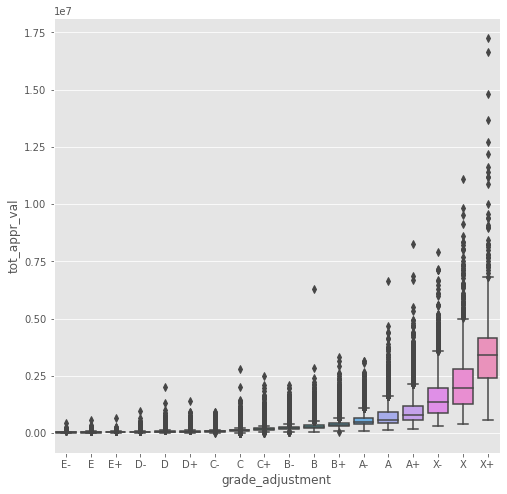

In [35]:
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.boxplot(x='grade_adjustment', y='tot_appr_val', data=comps, order=order)

In [36]:
comps['grade_adjustment'].value_counts()

C     332985
C+    198068
B-     92392
B      79460
C-     69560
B+     48358
D      37018
D+     26505
A-     20707
A      17455
A+     13514
D-     10391
X-      4932
X       2641
E       1699
E+      1175
X+       601
E-       221
Name: grade_adjustment, dtype: int64

The grade adjustment starts to significantly influence the appraised value after the B classification.

### market_area_1_dscr
Let's remove the areas with insufficient samples (<30).

In [37]:
comps['market_area_1_dscr'].value_counts().tail(16)

Kingwood, Huffman and Humble    11
FM 1960 West                     9
Place holder                     7
Far Northwest                    5
ISD 28 - Dayton ISD              5
East                             3
Interstate 10 East               3
Baytown                          2
Heights                          2
West Belt from I-10              1
West Loop South                  1
Energy Corridor                  1
ISD 08 - Alief Condos            1
Southwest Freeway Far            1
Near North                       1
Inner West                       1
Name: market_area_1_dscr, dtype: int64

In [38]:
drop_areas = list(comps['market_area_1_dscr'].value_counts().tail(16).index)

In [39]:
cond0 = ~comps['market_area_1_dscr'].isin(drop_areas)
comps = comps.loc[cond0, :]

Now let's build the order based on the median of the total appraised value.

In [40]:
order = comps.groupby('market_area_1_dscr')['tot_appr_val'].quantile(0.5).sort_values().index

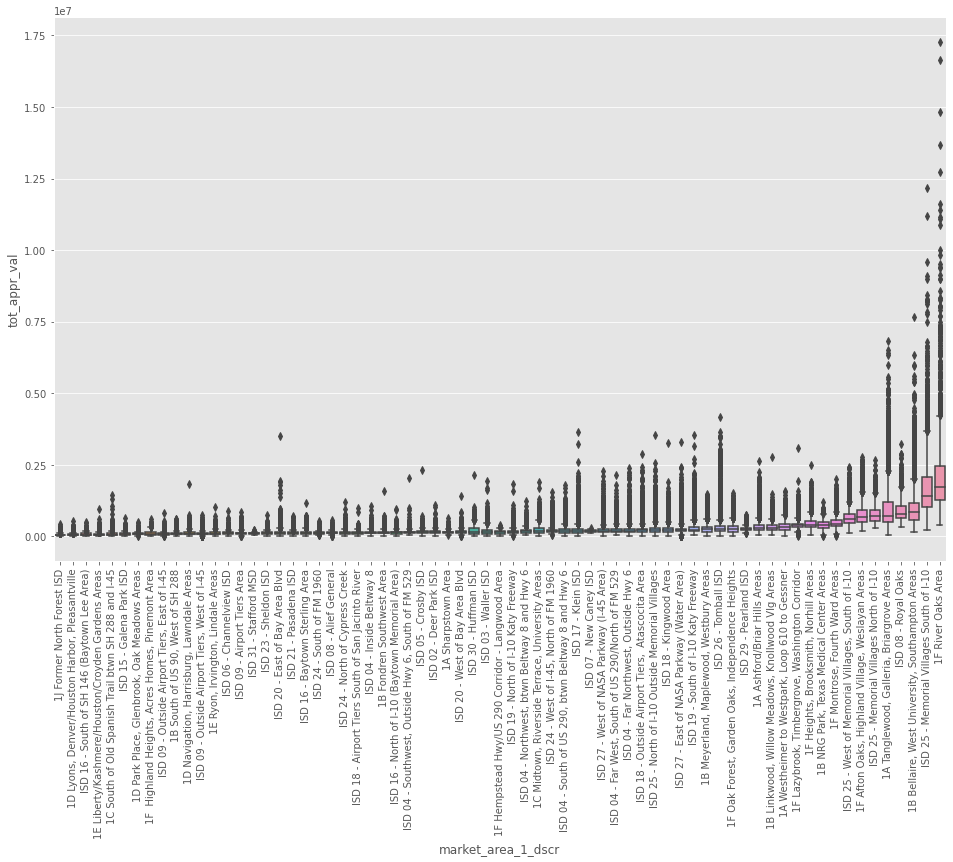

In [41]:
fig, ax = plt.subplots(figsize=(16,10))
_ = sns.boxplot(x='market_area_1_dscr', y='tot_appr_val', data=comps, order=order)
_ = plt.xticks(rotation=90)

Let's zoom in the figure above in the region of houses valued less than $1.2M.

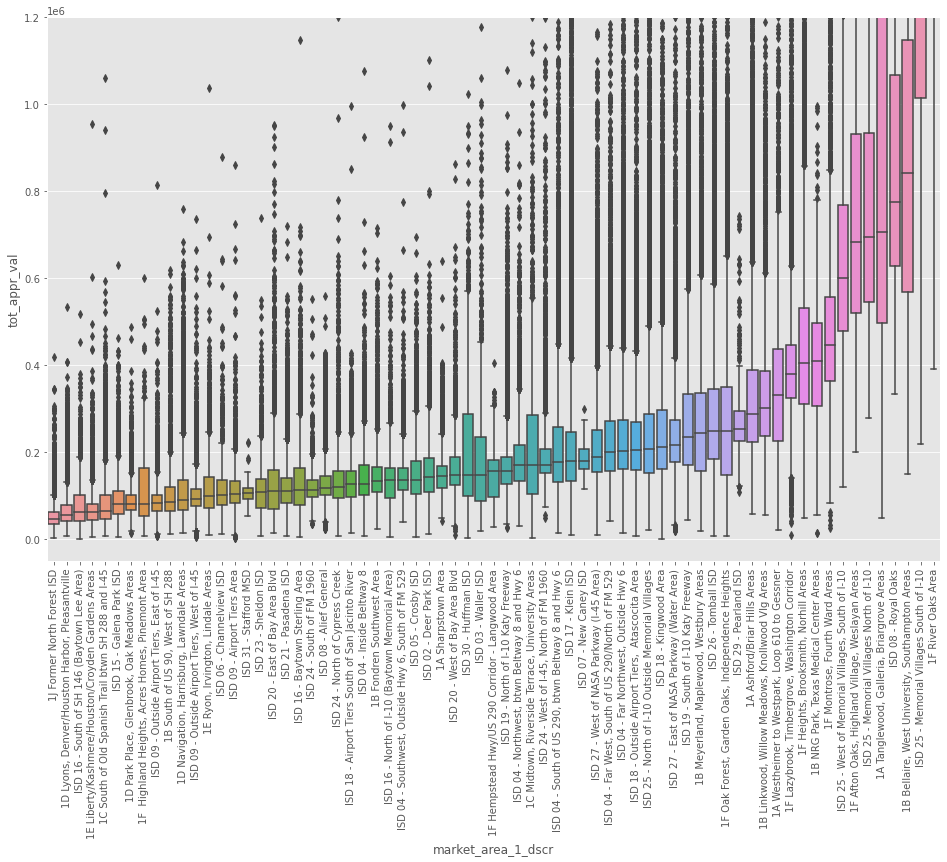

In [42]:
fig, ax = plt.subplots(figsize=(16,10))
_ = sns.boxplot(x='market_area_1_dscr', y='tot_appr_val', data=comps, order=order)
_ = plt.xticks(rotation=90)
_ = plt.ylim((-50000, 1200000))

Location, location, location!

The median appraised value moderately increases from the Former North Forest ISD market area to ISD-29 - Pearland, and then it increases tremendously up to 1F River Oaks (from which we only catch its bottom whisker on this plot).

### dscr
This is the current property quality description. It is an ordered categorical variable that can take values: 'Excellent', 'Superior', 'Good', 'Average', 'Low', 'Very Low', and 'Poor'.

In [43]:
comps['dscr'].value_counts()

Average      602824
Good         217188
Low           74220
Excellent     52136
Superior       8012
Very Low       3235
Poor             13
Name: dscr, dtype: int64

Let's drop the properties classified as poor since there are only 13 units.

In [44]:
cond0 = ~(comps['dscr'] == 'Poor')
comps = comps.loc[cond0, :]

In [45]:
order = ['Superior', 'Excellent', 'Good', 'Average', 'Low', 'Very Low']

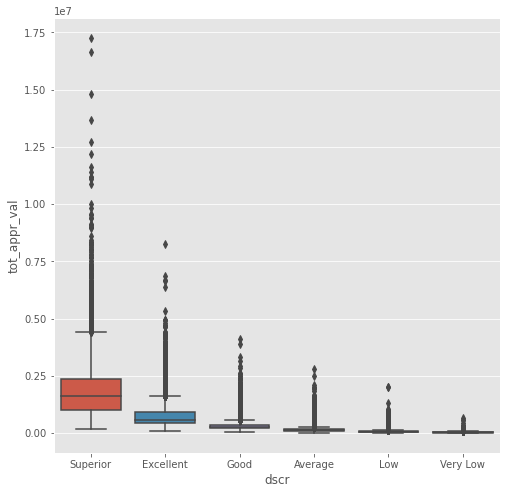

In [46]:
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.boxplot(x='dscr', y='tot_appr_val', data=comps, order=order)

Zooming in to properties valued less than $3M

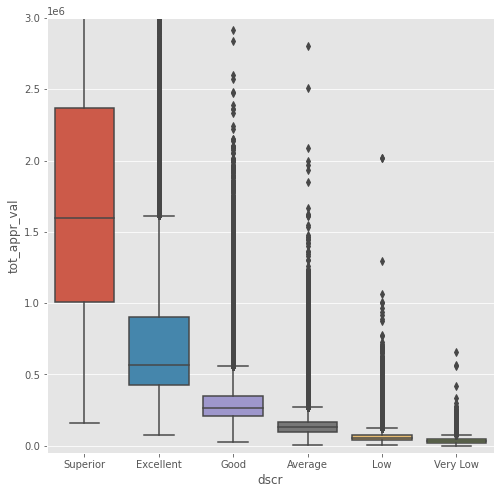

In [47]:
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.boxplot(x='dscr', y='tot_appr_val', data=comps, order=order)
_ = plt.ylim((-50000, 3000000))

`dscr` really seems to influence the appraised value.

Now let's compare `dscr` with `grade_adjustment` as it is possible that they are highly correlated. The idea is to group the properties by `dscr` and then draw a count plot of the `grade_adjustment` for each quality description.

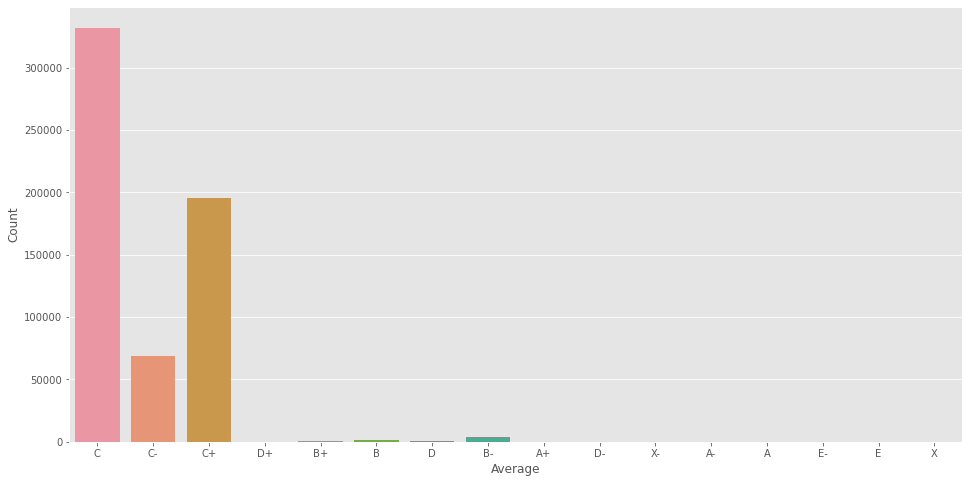

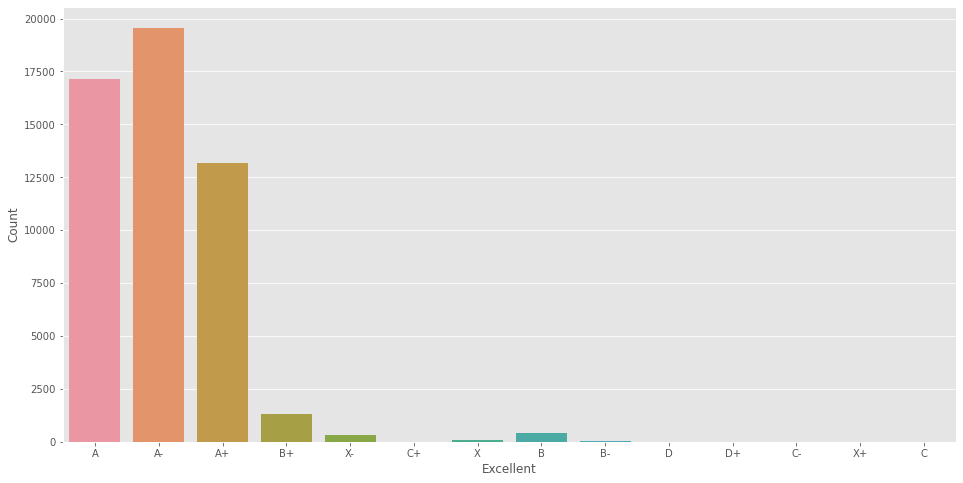

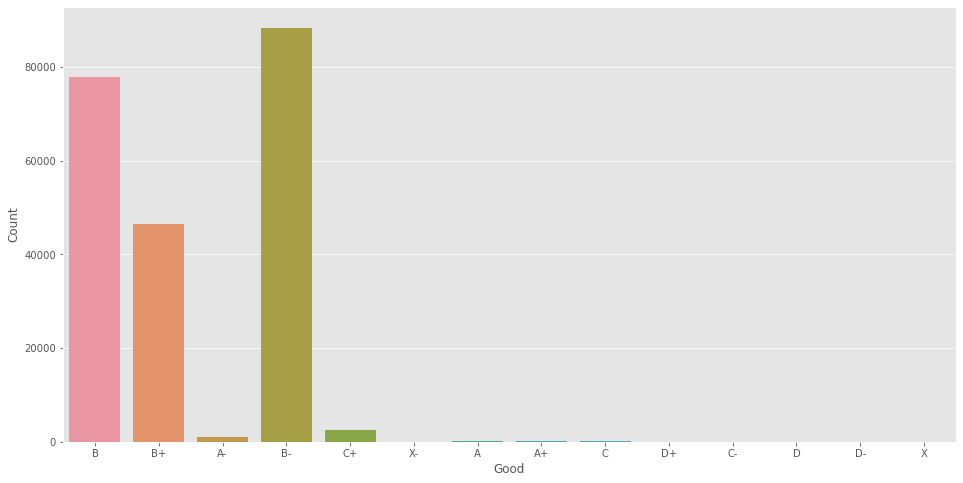

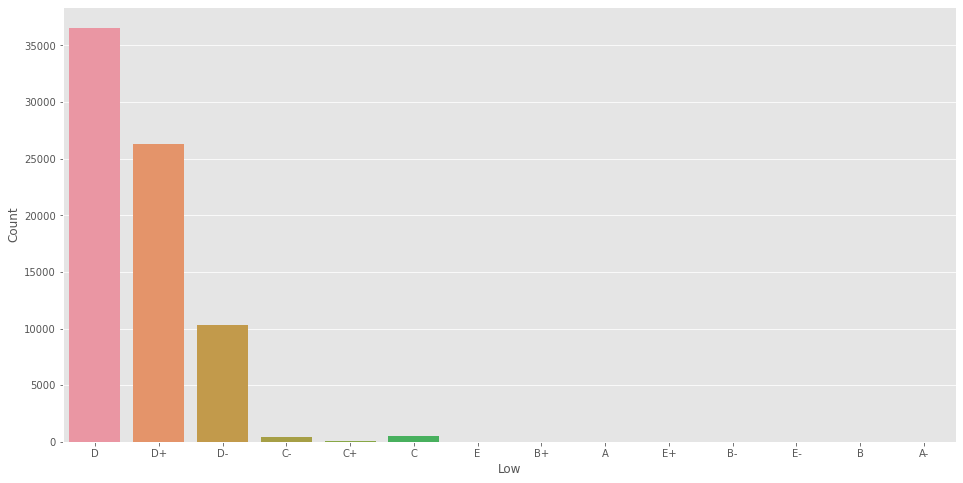

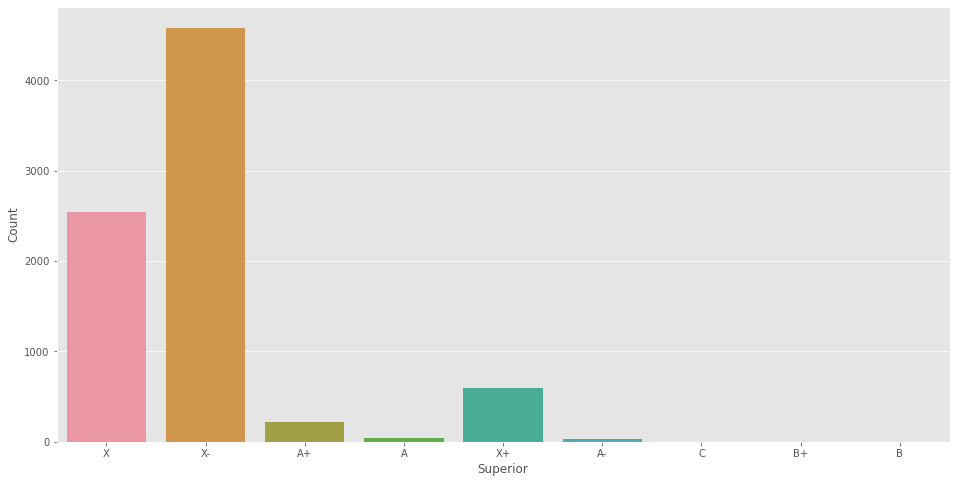

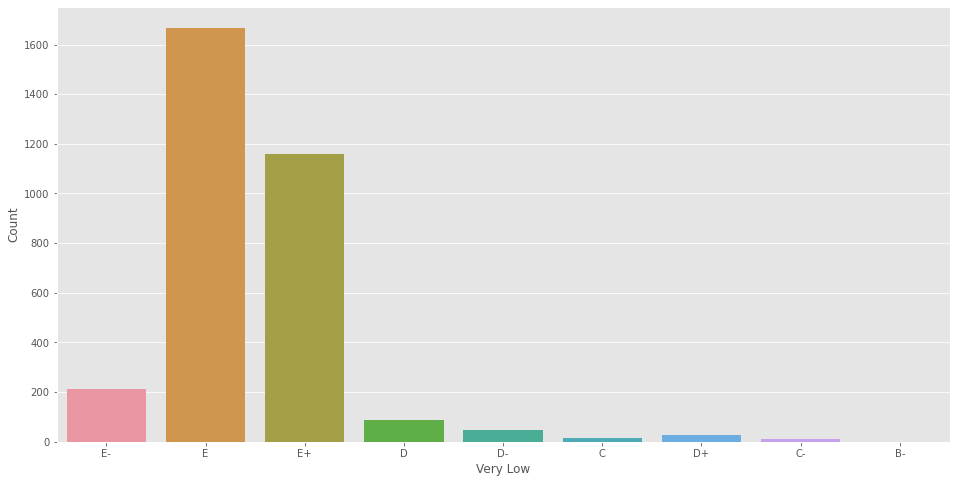

In [48]:
for group, df in comps.groupby('dscr'):
    ga = df['grade_adjustment']
    
    fig, ax = plt.subplots(figsize=(16,8))
    sns.countplot(x=ga)
    _ = plt.xlabel(group)
    _ = plt.ylabel('Count')

It looks like the quality descriptions have the following correspondence:

1) Very Low: E-, E, E+

2) Low: D-, D, D+

3) Average: C-, C, C+

4) Good: B-, B, B+

5) Excellent: A-, A, A+

6) Superior: X-, X, X+

with a few outliers. Let's keep both features for the time being.

# Check independence of selected features

## Is the total number of bathrooms a function of the house size?

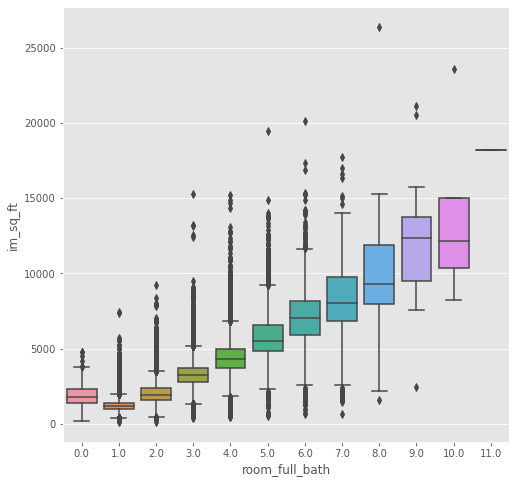

In [49]:
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.boxplot(x='room_full_bath', y='im_sq_ft', data=comps)

It looks like the bigger the house the more full bathrooms it has. Also, the variance of the distribution increases with the number of baths, possibly because the more baths the lower the sample size in that category.

I think there is enough variability in this plot to keep both features.

## Re-run sweetviz on selected features

In [64]:
keep = [
    'tot_appr_val',
    'prior_tot_appr_val',
    'prior_land_val',
    'im_sq_ft',
    'fixtures_total',
    'room_full_bath',
    'grade_adjustment',
    'market_area_1_dscr',
    'dscr',
    'date_erected', # We will need this down the road
    'yr_remodel', # We will need this down the road
]

In [65]:
features = comps.loc[:, keep]

In [67]:
if False:
    my_report = sv.analyze(features, target_feat='tot_appr_val')
    my_report.show_html(filepath='SWEETVIZ_REPORT_features.html')

:FEATURES DONE:                    |█████████████████████| [100%]   03:02  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:18  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT_features.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


Now the dependency between the selected features is clear in the sweetviz association plot:

![Sweetviz selected features only association](figures/sv_features_association.png)

There is a lot of independence between these features, so we need to approach the modeling step one feature at a time, to understand the contribution of each to the prediction.

Next, we should group the properties based on these features to find the distribution of properties where my target house belongs, and then assess the probability of getting my appraised value or more under this distribution.

# Export features

In [66]:
save_fn = ROOT_DIR / 'data/interim/2016/features.pickle'
save_pickle(features, save_fn)